# 데이터 및 분석 세부사항



## 고객사  - 데이터 수 (3월 ~ 6월)
* 90001441  -  122
* 90001341  -  122
* 90001302  -  122
* 90001443  -  122
* 90001521  -  122
* 90001541  -  122
* 90001542  -  122
* 90001502  -  114
* 90001582  -   92
* 90001602  -   72
* 90001381  -   63 (6월 데이터 부재)
* 90001622  -   53
* 90001662  -   52
* 90001683  -   38
* 90001682  -   35
* 90001702  -   34
* 90001705  -   33
* 90001703  -   33
* 90001664  -   32
* 90001704  -   32
* 90001768  -   20
* 90001776  -   13
* 90001765  -   10
* 90001774  -   4
* 90001842  -   3
* 90001562  -   2
* 90001802  -   2
* 90001762  -   1
* 90001772  -   1




#Train & Test set 설정

* Train : 3월, 4월, 5월

* Train & Test : 6월 전체 and 6월 마지막 7일

* 시간에 따라 발생되는 데이터이기에 TimeSeriesSplit 사용하여 검증

* 6월을 test set으로 설정하여 6월 이전의 데이터가 없는 경우 학습 및 평가 제외

* (제외 고객사 코드 :90001768, 90001776, 90001765, 90001774, 90001842, 90001562, 90001802, 90001762,90001772, 90001381)



# 시계열 결과

* 6시간 단위 - 상위 7개 488개 데이터

* order = 1,0,1
* seasonal order = 2, 0, 3, 8 

* mape = 0.590021

* 전체 데이터를 활용하여도 급격한 성능 개선이 예상되지 않음

----------------------------------------------------------

* 하루단위 - 상위 7개 122개 데이터

* order = 3, 0, 1
* seasonal order = 1, 0, 1, 4

* mape = 0.388571

----------------------------------------------------------

* 전체 데이터 - 16개 중 9개 데이터 예측

* 예측 가능 고객 데이터 (90001441, 90001341, 90001302, 90001443, 90001521, 90001541, 90001542, 90001582, 90001602)

* 예측 불가능 고객 데이터 (90001502, 90001381, 90001622, 90001662, 90001683, 90001682, 90001702)

* order = 3, 0, 1
* seasonal order = 1, 0, 3, 4

* mape = 0.3657


# 머신러닝 회귀 모델 결과

파생변수 - 휴일, 요일 활용 일반 모델 (result1)

파생변수 - 휴일, 요일 활용 로그 모델 (result2)

파생변수 - 휴일, 요일 및 IQR 이벤트 설정 로그 모델 (result3)

파생변수 - 휴일, 요일, IQR 이벤트 설정 및 누적평균 로그 모델 (result4)

파생변수 - 전부 활용 로그 모델 (result5)

--------------------------------------------------------------------------------

### 머신러닝 회귀 모델 6월 전체 예측 결과 (RandomForestRegressor) 

result1_mean_MAPE  =  0.679703

result2_mean_MAPE  =  0.453296

result3_mean_MAPE  =  0.334518

result4_mean_MAPE  =  0.300636

result5_mean_MAPE  =  0.303016


--------------------------------------------------------------------------------

### 머신러닝 앙상블 회귀 모델 6월 전체 예측 결과 (RandomForestRegressor + ExtraTreeRegressor) 


ensemble_result1_mean_MAPE   =  0.608570

ensemble_result2_mean_MAPE =    0.451666

ensemble_result3_mean_MAPE  =  0.334018

ensemble_result4_mean_MAPE   =  0.289809

ensemble_result5_mean_MAPE  =  0.287019

# 시계열 결과 및 머신러닝 모델 최종 결과 표

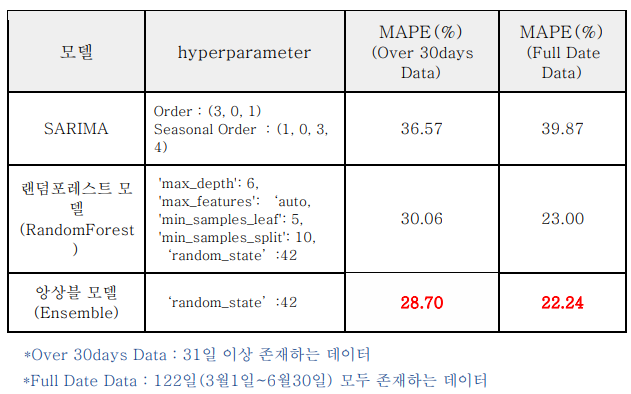

# 0. 환경 세팅


## 1) 구글 마운트 

In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
print('구글 드라이브 경로를 입력하세요. ("/gdrive/~")')
path = input()  # /gdrive/MyDrive/CJ_challenge/

구글 드라이브 경로를 입력하세요. ("/gdrive/~")
/gdrive/MyDrive/COMPETITION/CJ_challenge/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install scikit-learn==0.24.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,652 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 2) 라이브러리 및 데이터 불러오기

In [ ]:
### 라이브러리 ###
import os, re, pickle, scipy, math, warnings
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_percentage_error   # sklearn 0.24.2 버전에 추가됨, 이전 버전에는 없음
from tqdm import tqdm, tqdm_pandas
from statsmodels.tsa.stattools import adfuller  # stationary checking

warnings.filterwarnings(action='ignore')
tqdm_pandas(tqdm())


total_data = pd.read_pickle(path+'total_data.pickle')
explain = pd.read_excel(path+'2. 미래기술 챌린지 제공 Data(참고).xlsx')
sarima_orders = pd.read_csv(path+'SARIMA.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
0it [00:00, ?it/s]


# 1. 필요 함수 정의

## 1) 전처리 및 파생변수 생성

In [ ]:
# 1-1. 시계열 데이터 전처리
# 고객사 리스트(시계열)
# 정상성을 가지지 못한 관측치가 적은 데이터의 경우 차분을 하게 되면 예측이 불가하기 때문에 제외 [90001664,90001704, 90001705, 90001703]
# 6월 데이터 부재로 예측이 불가하여 평가에서 제외 [90001381]
customer_list_ts = [90001441, 90001341, 90001302, 90001443, 90001521, 90001541, 
                    90001542, 90001502, 90001582, 90001602, 90001622, 90001662,
                    90001683, 90001682, 90001702]
 

def preprocessing_ts(total_data):
    # 고객사 코드, 주문 날짜, 주문 시간, 수요 활용
    datasets = total_data[['SHPR_CD', 'BKG_DATE', 'BKG_TIME', 'ITEM_QTY']]

    datasets['BKG_DATE_t'] = datasets['BKG_DATE'].progress_apply(lambda x : str(x))
    datasets['BKG_DATE_t'] = datasets['BKG_DATE_t'].progress_apply(lambda x : x[:4]+'-'+x[4:6]+'-'+x[6:])
    datasets['BKG_DATE_t'] = datasets['BKG_DATE_t'].progress_apply(lambda x : dt.datetime.fromisoformat(x))
    datasets['weekdays'] = datasets['BKG_DATE_t'].dt.day_name()
    datasets['BKG_TIME'] = datasets['BKG_TIME'].progress_apply(lambda x : str(x))
    datasets['BKG_TIME'] = datasets['BKG_TIME'].progress_apply(lambda x : x.zfill(6))
    datasets['hours'] = datasets['BKG_TIME'].progress_apply(lambda x : int(x[:2]))

    daily_data = datasets.groupby(by=['SHPR_CD','BKG_DATE_t']).sum()
    daily_data = daily_data.reset_index()
    daily_cust_data = daily_data[daily_data['SHPR_CD'].isin(customer_list_ts)]  # 고객사 별 ID 있는 데이터만 추출

    return daily_cust_data


# 1-2. 머신러닝 데이터 전처리
# 고객사 리스트(머신러닝 데이터)
# 6월 데이터 부재로 예측이 불가하여 평가에서 제외 [90001381]
customer_list = [90001441,90001341,90001302,90001443,90001521,90001541,90001542,
                 90001502,90001582,90001602,90001622,90001662,90001683,
                 90001682,90001702,90001705,90001703,90001664,90001704] 

# 기존 데이터 변수 중 고객사 코드 & 브랜드 종류 & 수요 & 주문날짜 활용
def preprocessing(data):
    data = data[['SHPR_CD','BRAND_NM','ITEM_QTY','BKG_DATE']]
    data['BRAND_NM'] = data['BRAND_NM'].fillna('옵션없음')
    data = data.groupby(by=['SHPR_CD','BKG_DATE','BRAND_NM']).sum().reset_index()
    return data


# 고객사별 데이터 생성 
def customer_code_list(data):
    customer_list = [90001441,90001341,90001302,90001443,90001521,90001541,90001542,
                90001502,90001582,90001602,90001622,90001662,90001683,
                90001682,90001702,90001705,90001703,90001664,90001704]
    
    customer_data = {}
    for i in customer_list:
        customer_data[i] = data[data['SHPR_CD'].isin([i])].reset_index(drop=True)
    return customer_data


# 정규분포 확인 
def distribution(data):
    plt.figure(figsize=[10,5])
    plt.title('data : {}, data_quantity : {}'.format(data['SHPR_CD'][0],len(data['SHPR_CD'])))
    sns.distplot(data['ITEM_QTY'])

def log_distribution(data): # 로그스케일 후 정규분포 확인
    plt.figure(figsize=[10,5])
    plt.title('data : {}, data_quantity : {}'.format(data['SHPR_CD'][0],len(data['SHPR_CD'])))
    sns.distplot(np.log1p(data['ITEM_QTY']))


# ITEM_QTY 수요변수 로그스케일링
def log_scale(data):
    data['ITEM_QTY'] = np.log1p(data['ITEM_QTY'])
    return data



### 파생변수 - 평일 & 휴일, 요일, t-1 ~ t-7(수량) ###
# 공휴일 변수, 요일 변수 추가 및 더미 변수화
def week_holiday(data):
    data['BKG_DATE'] = data['BKG_DATE'].astype(str)
    data['BKG_DATE'] = pd.to_datetime(data['BKG_DATE'])
    data['days'] = data['BKG_DATE'].dt.strftime('%a')
    data['date'] = data['BKG_DATE'].dt.strftime('%w')
    data['BKG_DATE'] = data['BKG_DATE'].dt.strftime('%m%d')
    
    day = []
    for i in data['date']:
        if 1<=int(i)<=5: day.append('weekday')
        else: day.append('holiday')

    data['date'] = day 
    holiday = ['0505','0519'] #3~6월 공휴일 추가
    data['date'][data['BKG_DATE'].isin(holiday)] = 'holiday'
    day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    day_group = pd.get_dummies(data['days'])[day]
    holiday = pd.get_dummies(data['date']) #공휴일 더미 변수화

    brand_nm = pd.get_dummies(data['BRAND_NM']) #브랜드 종류 더미변수화

    data = pd.concat([data,day_group,holiday,brand_nm], axis=1).drop(columns=['days','date','BRAND_NM'])
    data = data.groupby(by=['SHPR_CD','BKG_DATE','weekday','holiday','Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun']).sum().reset_index()
    return data

# 하루전~일주일전 수량 변수 추가
def days_derived_var(data):
    for i in range(1,8):
        data['D-{}'.format(i)] = data['ITEM_QTY'].rolling(1).sum().shift(i).fillna(0)
        return data

### 파생변수 - 이벤트 ###
# IQR 이벤트 설정
def quartile(data):
    Q1 = data['ITEM_QTY'].quantile(.25)
    Q3 = data['ITEM_QTY'].quantile(.75)
    IQR = Q3 - Q1
    event_line = Q3+(IQR*1.5)
    event = data['ITEM_QTY'].apply(lambda x: 'Event' if x >= event_line else 'Norm')
    data['EVENT'] = event
    event = pd.get_dummies(data['EVENT'])
    event = pd.DataFrame(event)
    event_data = pd.concat([data,event], axis=1).drop(columns=['EVENT','SHPR_CD'])
    return event_data    

### 파생변수 - 누적평균 ###
# 이벤트에 해당하지 않는 데이터의 누적평균 변수 추가(1주, 2주, 3주, 4주전 누적평균)
def norm_average(data):
    try:
        data['tmp_norm'] = data['ITEM_QTY'][data['Norm'].isin([1])]
        for i,j in enumerate(range(7,29,7)):
            data['{}_week_norm'.format(i+1)] = data[data['Norm'].isin([1])].tmp_norm.rolling(int(j)).mean().shift(1)
        data.drop(columns=['tmp_norm'],inplace=True)
        return data.fillna(0)
    except: pass

### 파생변수 - t-1 ~ t-4 이벤트 ###
# t-1시점 이벤트부터 t-4 이벤트 수량 변수 추가
def before_event(data):
    data[['Before_event1','Before_event2','Before_event3','Before_event4']] = float(0)
    tmp = []
    tmp_index = []
    try:
        for i in data[data['Event'].isin([1])].index:
            tmp_index.append(i)
            tmp.append(data['ITEM_QTY'][i])
        for i in range(4):
            for j,k in enumerate(tmp_index[i+1:]):
                try:
                    data['Before_event{}'.format(i+1)][k] = tmp[j]
                except:
                    pass
    except: return data    
    return data    

## 2) 분석 모델 및 손실 함수 정의 (시계열 모델 / 일반 모델 / 로그스케일 모델)

In [ ]:
### 시계열 orders 검색 ###
def ckeck_mape_vals(sarima_orders):
    sarima_orders['0'] = sarima_orders['0'].apply(lambda x: str(int(x)))
    sarima_orders['1'] = sarima_orders['1'].apply(lambda x: str(int(x)))
    sarima_orders['2'] = sarima_orders['2'].apply(lambda x: str(int(x)))
    sarima_orders['3'] = sarima_orders['3'].apply(lambda x: str(int(x)))
    sarima_orders['4'] = sarima_orders['4'].apply(lambda x: str(int(x)))
    sarima_orders['orders'] = sarima_orders['0']+'0'+sarima_orders['1']+sarima_orders['2']+'0'+sarima_orders['3']+sarima_orders['4']
    sarima_orders_t = sarima_orders[['5','6', 'orders']]

    # 상위 7개 모두 계산 가능한 order, seasonal order 검색
    data=list(sarima_orders_t['orders'].value_counts()[sarima_orders_t['orders'].value_counts() == 7].index)

    seven_sarima = sarima_orders[sarima_orders['orders'].isin(data)]
    mape_vals = seven_sarima.groupby(by='orders').sum()/7
    mape_vals = mape_vals.sort_values(by='6')
    return mape_vals


### 일반 모델 ###
# RandomForest
def exp_prediction_model(data, customer):
    tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=1)
    test_predictions = []
    test_MAPE = []
    model = RandomForestRegressor(random_state=42)
    for train_idx, test_idx in tscv.split(data):
        x_train = data.iloc[train_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_train = data.iloc[train_idx]['ITEM_QTY']

        x_test = data.iloc[test_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_test = data.iloc[test_idx]['ITEM_QTY']

        model.fit(x_train,y_train)
        predict = model.predict(x_test)
        predict = np.squeeze(predict)[()]
        test_predictions.append(predict)
        score = MAPE_function(y_test, predict)
        test_MAPE.append(score)

    result = data[len(data)-30:][['BKG_DATE','ITEM_QTY']]
    result['predict'] = test_predictions
    result['MAPE'] = test_MAPE
    result['Customer_code'] = customer

    return result

# Ensemble(RandomForest + ExtraTree)
def exp_ensemble_model(data, customer):
    tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=1)
    test_predictions = []
    test_MAPE = []
    model_rf = RandomForestRegressor(random_state=42)
    model_et = ExtraTreesRegressor(random_state=42)

    model_vo = VotingRegressor(estimators = [('RF', model_rf), ('ET', model_et)])
    for train_idx, test_idx in tscv.split(data):
        x_train = data.iloc[train_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_train = data.iloc[train_idx]['ITEM_QTY']

        x_test = data.iloc[test_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_test = data.iloc[test_idx]['ITEM_QTY']

        model_vo.fit(x_train,y_train)
        predict = model_vo.predict(x_test)
        predict = np.squeeze(predict)[()]
        test_predictions.append(predict)
        score = MAPE_function(y_test, predict)
        test_MAPE.append(score)

    result = data[len(data)-30:][['BKG_DATE','ITEM_QTY']]
    result['predict'] = test_predictions
    result['MAPE'] = test_MAPE
    result['Customer_code'] = customer

    return result


### 로그 스케일 모델 ###
# RandomForest
def log_prediction_model(data, customer):
    tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=1)
    test_predictions = []
    test_MAPE = []
    model = RandomForestRegressor(random_state = 42)
    for train_idx, test_idx in tscv.split(data):
        x_train = data.iloc[train_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_train = data.iloc[train_idx]['ITEM_QTY']

        x_test = data.iloc[test_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_test = data.iloc[test_idx]['ITEM_QTY']
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        pred = np.expm1(np.squeeze(pred)[()])
        test_predictions.append(pred)
        score = MAPE_function(np.expm1(y_test), pred)
        test_MAPE.append(score)

    result = data[len(data)-30:][['BKG_DATE','ITEM_QTY']]
    result['ITEM_QTY'] = np.expm1(result['ITEM_QTY']).astype(int)
    result['predict'] = test_predictions
    result['MAPE'] = test_MAPE
    result['Customer_code'] = customer

    return result


# Ensemble(RandomForest + ExtraTree)
def log_ensemble_model(data, customer):
    tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=1)
    test_predictions = []
    test_MAPE = []
    model_rf = RandomForestRegressor(random_state=42)
    model_et = ExtraTreesRegressor(random_state=42)

    model_vo = VotingRegressor(estimators = [('RF', model_rf), ('ET', model_et)])
    for train_idx, test_idx in tscv.split(data):
        x_train = data.iloc[train_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_train = data.iloc[train_idx]['ITEM_QTY']

        x_test = data.iloc[test_idx].drop(labels=['ITEM_QTY','BKG_DATE'],axis=1)
        y_test = data.iloc[test_idx]['ITEM_QTY']
        model_vo.fit(x_train,y_train)
        pred = model_vo.predict(x_test)
        pred = np.expm1(np.squeeze(pred)[()])
        test_predictions.append(pred)
        score = MAPE_function(np.expm1(y_test), pred)
        test_MAPE.append(score)

    result = data[len(data)-30:][['BKG_DATE','ITEM_QTY']]
    result['ITEM_QTY'] = np.expm1(result['ITEM_QTY']).astype(int)
    result['predict'] = test_predictions
    result['MAPE'] = test_MAPE
    result['Customer_code'] = customer

    return result


### 손실 함수 ###
# MAPE
def MAPE_function(y_true, y_pred): 
	return np.mean(np.abs((y_true - y_pred) / y_true))


### 기타 연산 함수 ###
def Average(lst):
    return sum(lst) / len(lst)

# 2. 분석 진행


## 1) 시계열 모델

In [ ]:
### 정상성 확인 ###

daily_cust_data = preprocessing_ts(total_data)

# 딕셔너리 형태로 데이터 저장
prod_ids = {}
for i in daily_cust_data['SHPR_CD'].unique():
    prod_ids[i] = daily_cust_data[daily_cust_data['SHPR_CD']==i]

# Split train, test datasets (TRAIN :MARCH, APRIL, MAY , TEST : JUNE)
# set datetime as index
full_train_data, full_test_data = {}, {}

for i in customer_list_ts:
    full_train_data[i] = prod_ids[i][prod_ids[i]['BKG_DATE_t']<'2021-06'][['BKG_DATE_t','ITEM_QTY']].set_index('BKG_DATE_t')
    full_test_data[i] = prod_ids[i][prod_ids[i]['BKG_DATE_t']>='2021-06'][['BKG_DATE_t','ITEM_QTY']].set_index('BKG_DATE_t')
  #  데이터 부족으로 활용 불가 [90001664, 90001704, 90001705, 90001703]

# stationary checking
for i in customer_list_ts:
    x = full_train_data[i]['ITEM_QTY']
    result = adfuller(x)
    print(i)
    print("ADF Stataics ",result[0])
    print("p-value",result[1])
    print("critical values",result[5])
    if result[1]<=0.05:
        print("fail to reject null hypothese h1 , it mean data is stationary")
    else:
        print("Reject the null hypotheise , it mean data is not stationary")

1786374it [00:10, 172389.09it/s]
100%|██████████| 1786374/1786374 [00:02<00:00, 640161.13it/s]


90001441
ADF Stataics  -6.539205226045363
p-value 9.439383176664566e-09
critical values 1398.9518573550872
fail to reject null hypothese h1 , it mean data is stationary
90001341
ADF Stataics  -7.76744708119683
p-value 9.10794164191288e-12
critical values 1408.9641292583613
fail to reject null hypothese h1 , it mean data is stationary
90001302
ADF Stataics  -9.571195528758027
p-value 2.285859598381689e-16
critical values 1812.8056552151463
fail to reject null hypothese h1 , it mean data is stationary
90001443
ADF Stataics  -7.720284559397181
p-value 1.1976921304419906e-11
critical values 1336.3594841920124
fail to reject null hypothese h1 , it mean data is stationary
90001521
ADF Stataics  -8.85184476825622
p-value 1.565264737791825e-14
critical values 1318.6096138999037
fail to reject null hypothese h1 , it mean data is stationary
90001541
ADF Stataics  -7.596735483109697
p-value 2.4491230586953155e-11
critical values 1340.9263982976256
fail to reject null hypothese h1 , it mean data i

In [ ]:
### q,d,p, Q,D,P,S 각각 값 입력하여 값 예측 후  mape 계산 ###
# 최적의 order와 seasonal order 탐색 (SARIMA.CSV 파일에 결과 저장)

'''
a, b, c, d, e, f, g, mape_values =[], [], [], [], [], [], [], []

for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            for l in range(1, 4):
                for m in range(1, 6):
                    try: 
                        for n in full_train_data:
                            model=sm.tsa.statespace.SARIMAX(full_train_data[n],order=(i, 0, j),seasonal_order=(k, 0, l, m))
                            result=model.fit()
                            sarima_pred = result.predict(start=92, end=121, dynamic=True)
                            #mape_values.append(MAPE(full_test_data[n], sarima_pred))
                            print(i, 0, j, "---", k, 0, l, m, "---", n, "---",  mean_absolute_percentage_error(full_test_data[n], sarima_pred))
                            

                            a.append(i)
                            b.append(j)
                            c.append(k)
                            d.append(l)
                            e.append(m)
                            f.append(n)
                            g.append(mean_absolute_percentage_error(full_test_data[n], sarima_pred))
                    except:
                        pass

# pd.DataFrame([a,b,c,d,e,f,g]).T.to_csv('/gdrive/MyDrive/Colab Notebooks/SARIMA.csv', index=None)
# sarima_orders = pd.DataFrame([a,b,c,d,e,f,g]).T
'''

mape_vals = ckeck_mape_vals(sarima_orders)
mape_vals['6'][mape_vals['6']<0.4]

orders
3011014    0.388571
1023027    0.392805
1012027    0.393417
2012037    0.395060
3011034    0.396806
Name: 6, dtype: float64

In [ ]:
# MAPE 값이 0.4 이하인 order 확인 후 customer_list_ts에 있는 데이터 활용하여 예측 후 평균 MAPE값 계산 확인
mape_values = []
keys = []
success_list = []
fail_list = []
for i in customer_list_ts:
    try:
        model=sm.tsa.statespace.SARIMAX(full_train_data[i],order=(3, 0, 1),seasonal_order=(1, 0, 3, 4))
        result=model.fit()
        sarima_pred = result.predict(start=92, end=121, dynamic=True)
        mape_values.append(mean_absolute_percentage_error(full_test_data[i], sarima_pred))
        keys.append(i)
        success_list.append(i)
    except:
        pass
        fail_list.append(i)


print('success_list : ', success_list)
print('fail_list : ', fail_list)
Average(mape_values)

success_list :  [90001441, 90001341, 90001302, 90001443, 90001521, 90001541, 90001542, 90001582, 90001602]
fail_list :  [90001502, 90001622, 90001662, 90001683, 90001682, 90001702]


0.3657295987672493

6시간 단위 - 상위 7개 488개 데이터

order = 1,0,1
seasonal order = 2, 0, 3, 8 

mape = 0.590021

전체 데이터를 활용하여도 급격한 성능 개선이 예상되지 않음

----------------------------------------------------------

하루단위 - 상위 7개 122개 데이터

order = 3, 0, 1
seasonal order = 1, 0, 3, 4

mape = 0.3987

----------------------------------------------------------

전체 데이터 - 16개 중 9개 데이터 예측

예측 가능 고객 데이터 (90001441, 90001341, 90001302, 90001443, 90001521, 90001541, 90001542, 90001582, 90001602)

예측 불가능 고객 데이터 (90001502, 90001381, 90001622, 90001662, 90001683, 90001682, 90001702)

order = 3, 0, 1

seasonal order = 1, 0, 3, 4

mape = 0.3657

## 2) 머신러닝 회귀 모델 (RandomForestRegressor)

### 파생변수 - 휴일, 요일 활용 일반 모델 (result1)

In [ ]:
preprocessing_data1 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
add_valid_data1 = week_holiday(preprocessing_data1) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
customer_data1 = customer_code_list(add_valid_data1) # 고객사별 dict화
for i in customer_list: 
    customer_data1[1] = days_derived_var(customer_data1[i]) # 고객사 별 하루전~일주일전 파생변수 추가 

##### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    customer_data1[i] = exp_prediction_model(customer_data1[i], i) # 학습 및 예측결과값
    MAPE.append(customer_data1[i]['MAPE'].mean())
    customer_code.append(int(customer_data1[i]['Customer_code'].mean()))

result1 = pd.DataFrame(customer_code, columns = ['customer_code'])
result1['result1_mean_MAPE'] = MAPE

### 파생변수 - 휴일, 요일 활용 로그스케일 모델 (result2)

In [ ]:
preprocessing_data2 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
add_valid_data2 = week_holiday(preprocessing_data2) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
customer_data2 = customer_code_list(add_valid_data2) # 고객사별 dict화
for i in customer_list:
    customer_data2[i] = log_scale(customer_data2[i]) # 고객사 별 수량 로그스케일적용

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    customer_data2[i] = log_prediction_model(customer_data2[i], i) # 학습 및 예측결과값
    MAPE.append(customer_data2[i]['MAPE'].mean())
    customer_code.append(int(customer_data2[i]['Customer_code'].mean()))

result2 = pd.DataFrame(customer_code, columns = ['customer_code'])
result2['result2_mean_MAPE'] = MAPE

### 파생변수 - 휴일, 요일 및 IQR 이벤트 설정 로그스케일 모델 (result3)


In [ ]:
preprocessing_data3 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
add_valid_data3 = week_holiday(preprocessing_data3) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
customer_data3 = customer_code_list(add_valid_data3) # 고객사별 dict화 

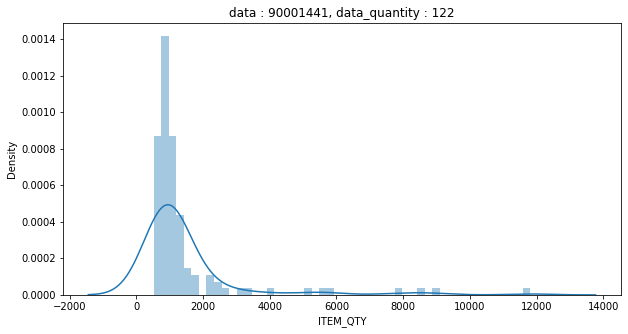

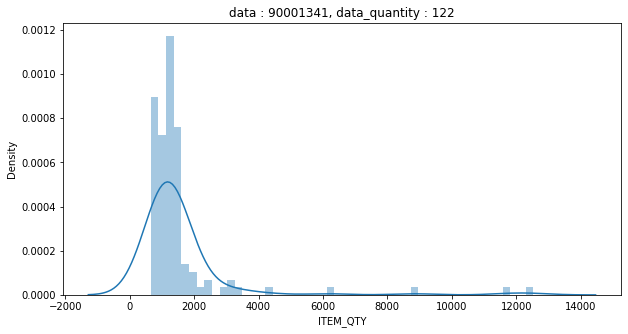

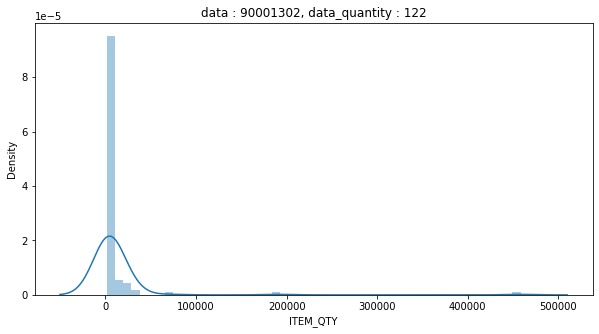

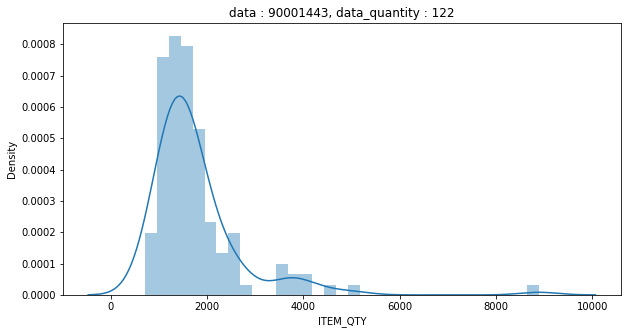

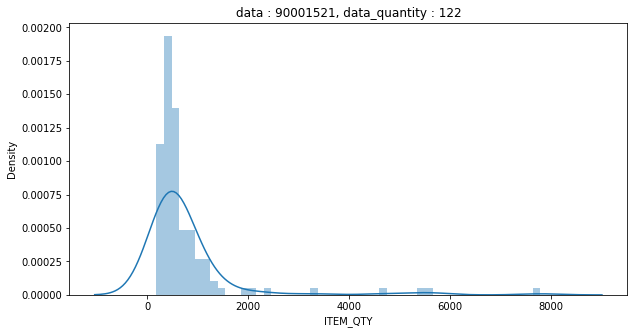

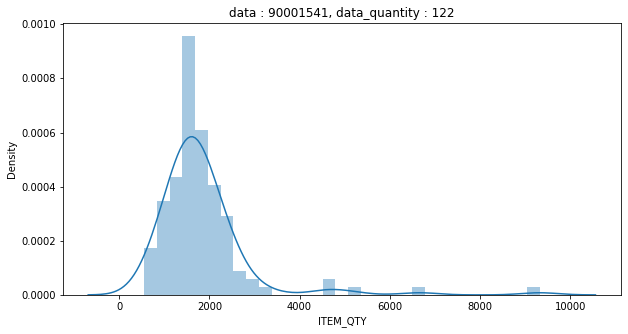

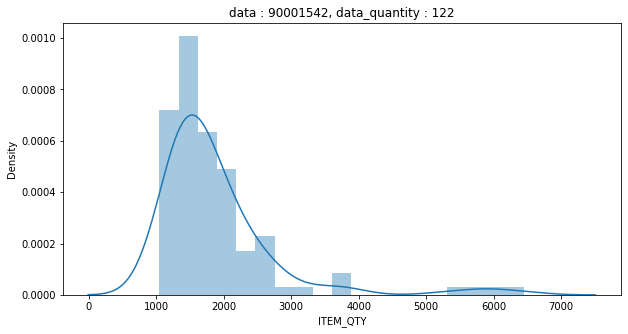

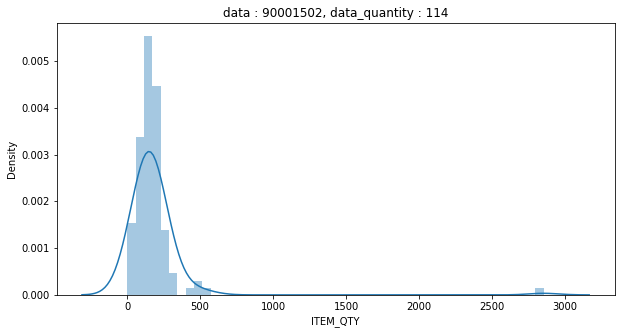

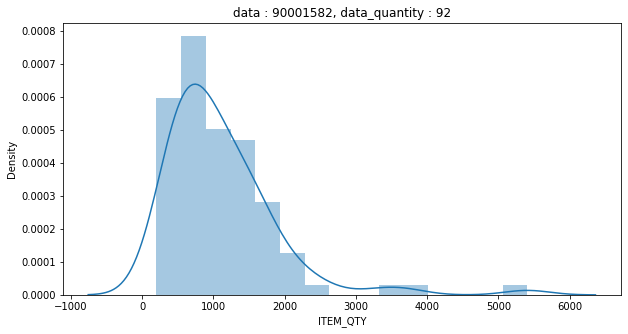

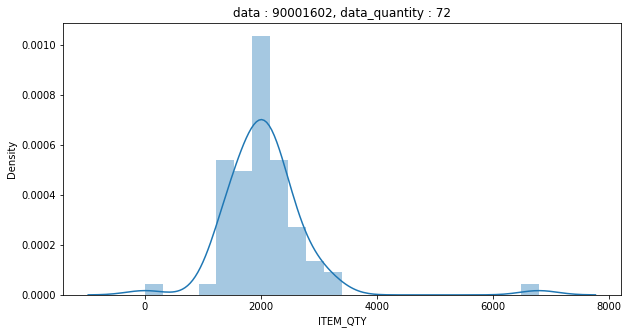

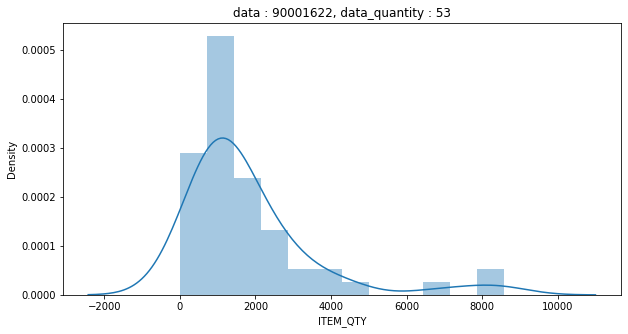

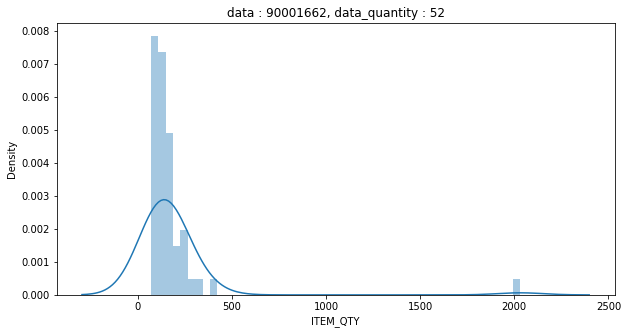

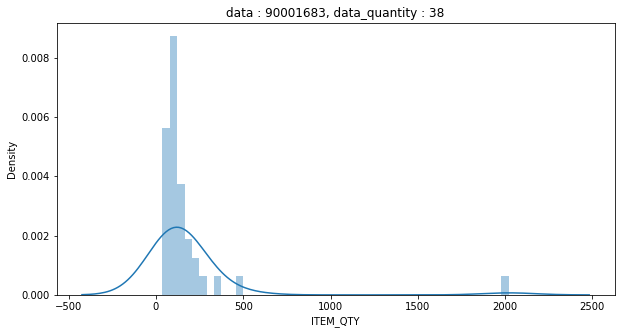

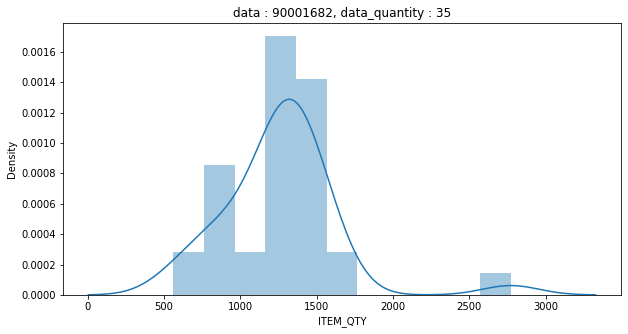

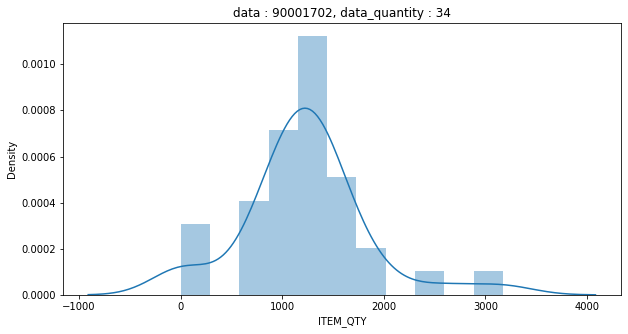

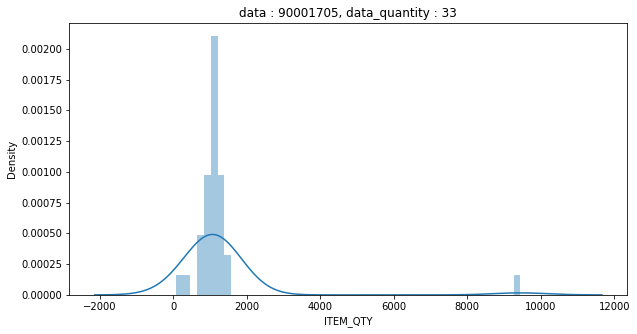

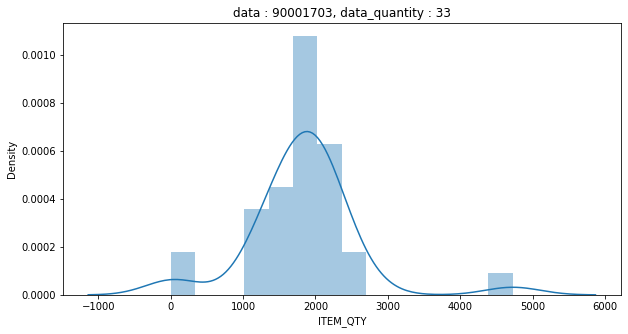

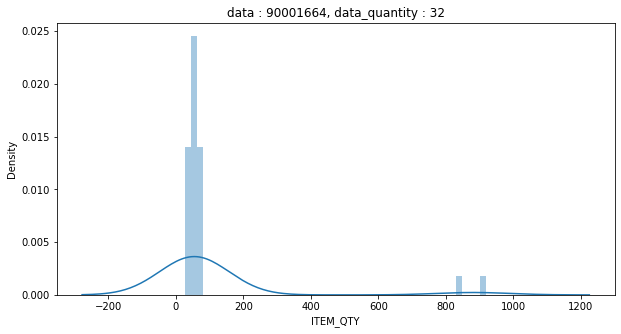

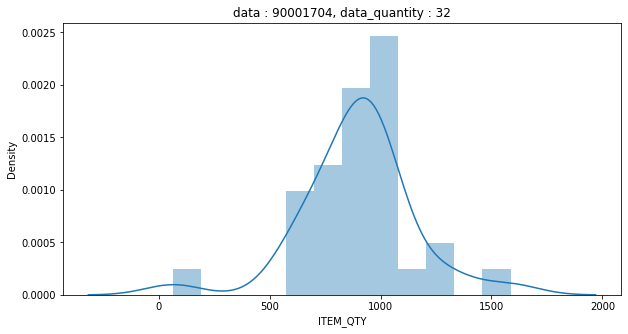

In [ ]:
for i in customer_list:   
    distribution(customer_data3[i]) #정규분포를 띄지 않음(수량)

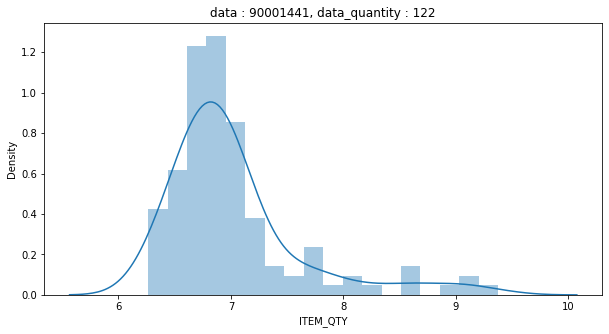

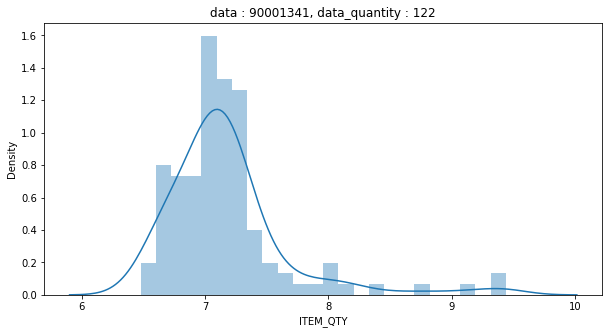

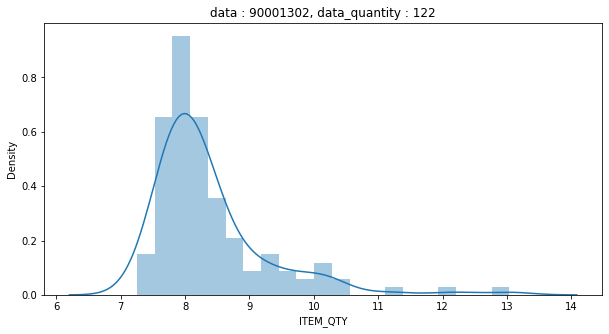

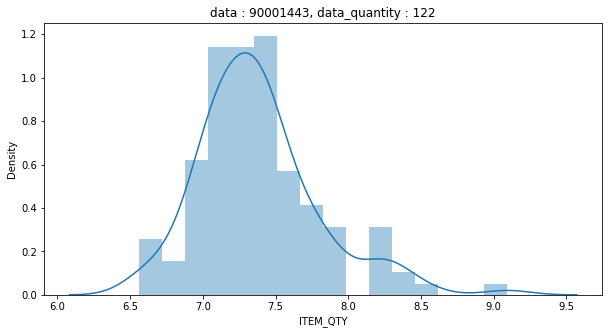

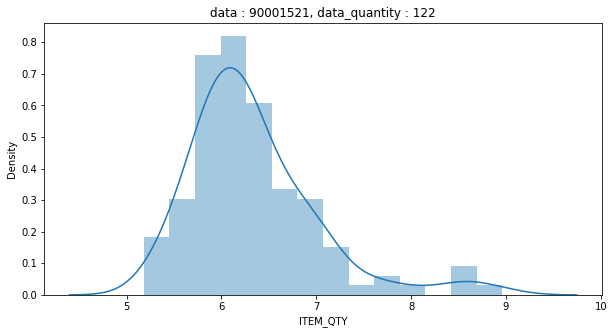

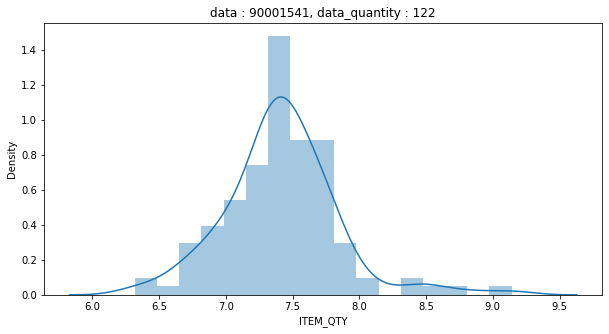

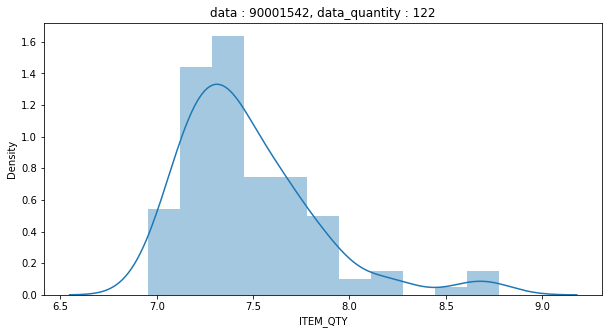

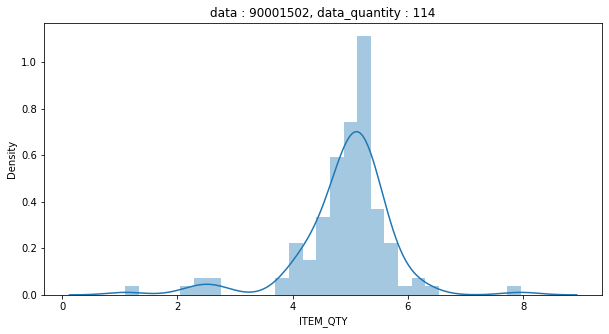

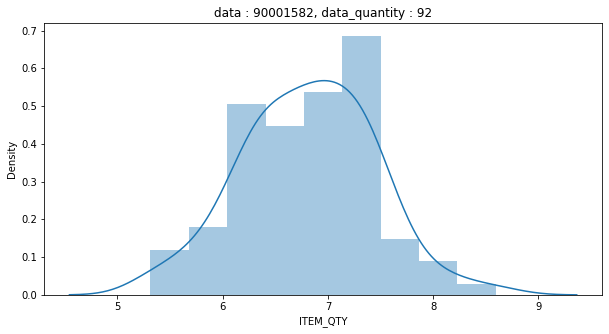

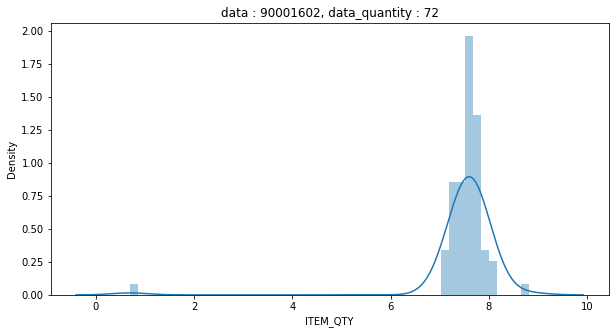

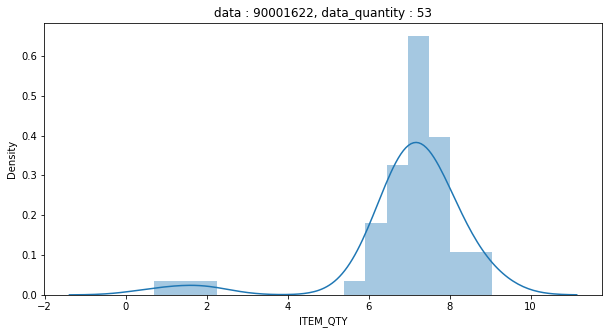

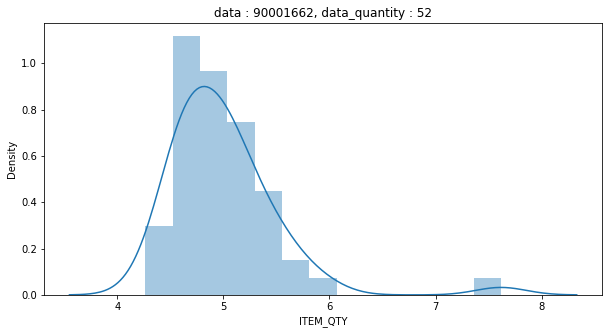

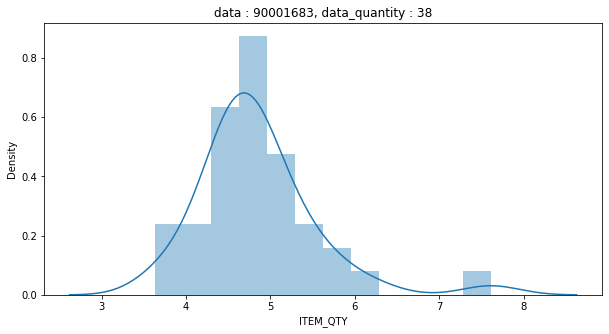

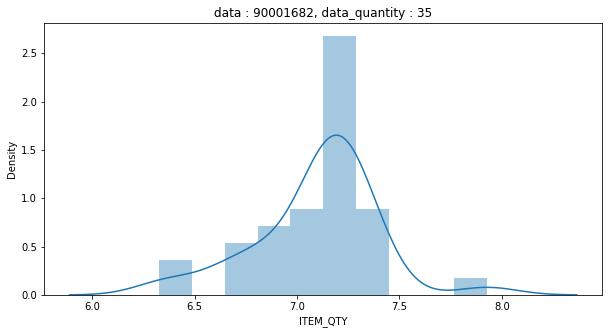

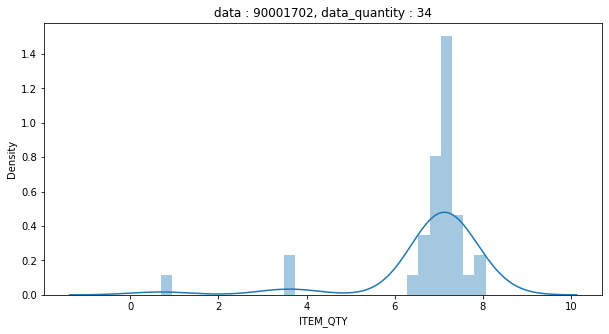

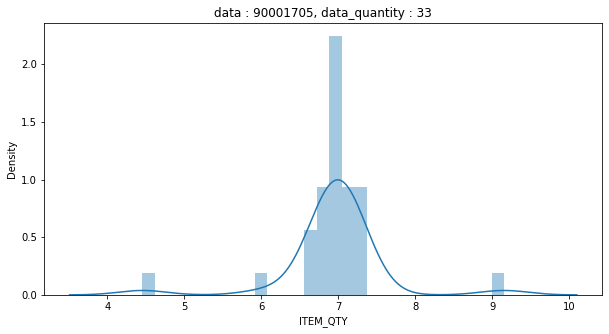

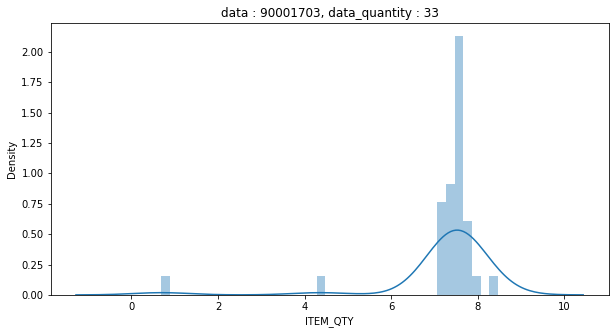

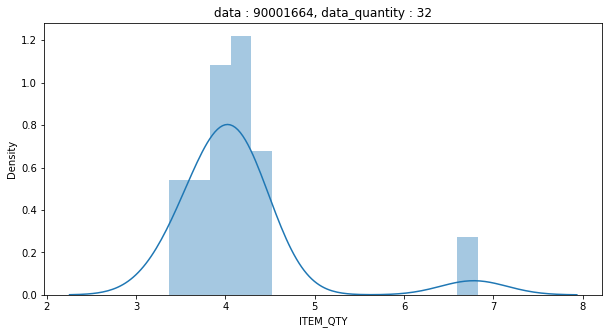

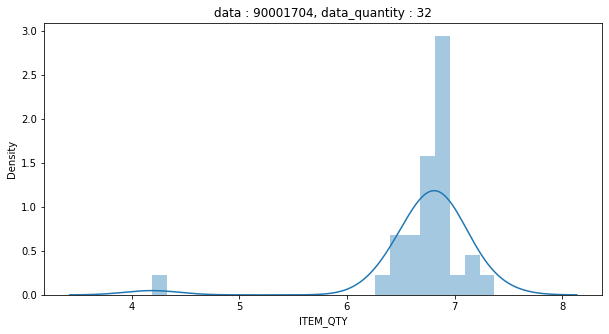

In [ ]:
for i in customer_list:   
    log_distribution(customer_data3[i]) # 정규분포를 띄지 않음(수량 로그화)

In [ ]:
for i in customer_list:
    customer_data3[i] = log_scale(customer_data3[i]) # 고객사 별 수량 로그스케일적용
    customer_data3[i] = days_derived_var(customer_data3[i]) # 고객사 별 하루전~일주일전 파생변수 추가
    customer_data3[i] = quartile(customer_data3[i]) # 고객사 별 제 (3사분위수 + (1.5 * IQR)) 보다 높은 수량 이벤트 설정

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    customer_data3[i] = log_prediction_model(customer_data3[i], i) # 학습 및 예측결과값
    MAPE.append(customer_data3[i]['MAPE'].mean())
    customer_code.append(int(customer_data3[i]['Customer_code'].mean()))

result3 = pd.DataFrame(customer_code, columns = ['customer_code'])
result3['result3_mean_MAPE'] = MAPE

### 파생변수 - 휴일, 요일, IQR 이벤트 설정 및 누적평균 로그스케일 모델 (result4)

In [ ]:
preprocessing_data4 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
add_valid_data4 = week_holiday(preprocessing_data4) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
customer_data4 = customer_code_list(add_valid_data4) # 고객사별 dict화 

In [ ]:
for i in customer_list:
    customer_data4[i] = log_scale(customer_data4[i]) # 고객사 별 수량 로그스케일적용
    customer_data4[i] = quartile(customer_data4[i]) # 고객사 별 제 (3사분위수 + (1.5 * IQR)) 보다 높은 수량 이벤트 설정
    customer_data4[i] = norm_average(customer_data4[i]) # Event를 제외한 Norm데이터 7일, 14일, 21일, 28일 누적평균 변수 추가(파생변수3)
    customer_data4[i] = before_event(customer_data4[i]) # 전이벤트~4번째전 이벤트 수량 변수 추가(파생변수3)

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    customer_data4[i] = log_prediction_model(customer_data4[i], i) # 학습 및 예측결과값
    MAPE.append(customer_data4[i]['MAPE'].mean())
    customer_code.append(int(customer_data4[i]['Customer_code'].mean()))

result4 = pd.DataFrame(customer_code, columns = ['customer_code'])
result4['result4_mean_MAPE'] = MAPE

### 파생변수 - 전부 활용 로그스케일 모델 (result5)


In [ ]:
preprocessing_data5 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
add_valid_data5 = week_holiday(preprocessing_data5) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
customer_data5 = customer_code_list(add_valid_data5) # 고객사별 dict화 

In [ ]:
for i in customer_list:
    customer_data5[i] = log_scale(customer_data5[i]) # 고객사 별 수량 로그스케일적용
    customer_data5[i] = days_derived_var(customer_data5[i]) # 고객사 별 하루전~일주일전 파생변수 추가 (파생변수 2)
    customer_data5[i] = quartile(customer_data5[i]) # 고객사 별 제 (3사분위수 + (1.5 * IQR)) 보다 높은 수량 이벤트 설정
    customer_data5[i] = norm_average(customer_data5[i]) # Event를 제외한 Norm데이터 7일, 14일, 21일, 28일 누적평균 변수 추가(파생변수3)
    customer_data5[i] = before_event(customer_data5[i]) # 전이벤트~4번째전 이벤트 수량 변수 추가(파생변수3)

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    customer_data5[i] = log_prediction_model(customer_data5[i], i) # 학습 및 예측결과값
    MAPE.append(customer_data5[i]['MAPE'].mean())
    customer_code.append(int(customer_data5[i]['Customer_code'].mean()))

result5 = pd.DataFrame(customer_code, columns = ['customer_code'])
result5['result5_mean_MAPE'] = MAPE

## 3) Ensemble 로그 모델 (RandomForestRegressor + ExtraTreeRegressor)

### 파생변수 - 휴일, 요일 활용 일반 모델 (ensemble_result1)

In [ ]:
ensemble_preprocessing_data1 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
ensemble_add_valid_data1 = week_holiday(ensemble_preprocessing_data1) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
ensemble_customer_data1 = customer_code_list(ensemble_add_valid_data1) # 고객사별 dict화
for i in customer_list: 
    ensemble_customer_data1[1] = days_derived_var(ensemble_customer_data1[i]) # 고객사 별 하루전~일주일전 파생변수 추가

##### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    ensemble_customer_data1[i] = exp_ensemble_model(ensemble_customer_data1[i], i) # 학습 및 예측결과값
    MAPE.append(ensemble_customer_data1[i]['MAPE'].mean())
    customer_code.append(int(ensemble_customer_data1[i]['Customer_code'].mean()))

ensemble_result1 = pd.DataFrame(customer_code, columns = ['customer_code'])
ensemble_result1['ensemble_result1_mean_MAPE'] = MAPE

### 파생변수 - 휴일, 요일 및 과거 수량(1일 ~ 7일전) 활용 로그스케일 모델 (ensemble_result2)

In [ ]:
ensemble_preprocessing_data2 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
ensemble_add_valid_data2 = week_holiday(ensemble_preprocessing_data2) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
ensemble_customer_data2 = customer_code_list(ensemble_add_valid_data2) # 고객사별 dict화
for i in customer_list:
    ensemble_customer_data2[i] = log_scale(ensemble_customer_data2[i]) # 고객사 별 수량 로그스케일적용

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    ensemble_customer_data2[i] = log_ensemble_model(ensemble_customer_data2[i], i) # 학습 및 예측결과값
    MAPE.append(ensemble_customer_data2[i]['MAPE'].mean())
    customer_code.append(int(ensemble_customer_data2[i]['Customer_code'].mean()))

ensemble_result2 = pd.DataFrame(customer_code, columns = ['customer_code'])
ensemble_result2['ensemble_result2_mean_MAPE'] = MAPE

### 파생변수 - 휴일, 요일, 과거 수량(1일 ~ 7일전) 및 IQR 이벤트 설정 로그스케일 모델 (ensemble_result3)


In [ ]:
ensemble_preprocessing_data3 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
ensemble_add_valid_data3 = week_holiday(ensemble_preprocessing_data3) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
ensemble_customer_data3 = customer_code_list(ensemble_add_valid_data3) # 고객사별 dict화 

In [ ]:
for i in customer_list:
    ensemble_customer_data3[i] = log_scale(ensemble_customer_data3[i]) # 고객사 별 수량 로그스케일적용
    ensemble_customer_data3[i] = days_derived_var(ensemble_customer_data3[i]) # 고객사 별 하루전~일주일전 파생변수 추가
    ensemble_customer_data3[i] = quartile(ensemble_customer_data3[i]) # 고객사 별 제 (3사분위수 + (1.5 * IQR)) 보다 높은 수량 이벤트 설정

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    ensemble_customer_data3[i] = log_ensemble_model(ensemble_customer_data3[i], i) # 학습 및 예측결과값
    MAPE.append(ensemble_customer_data3[i]['MAPE'].mean())
    customer_code.append(int(ensemble_customer_data3[i]['Customer_code'].mean()))

ensemble_result3 = pd.DataFrame(customer_code, columns = ['customer_code'])
ensemble_result3['ensemble_result3_mean_MAPE'] = MAPE

### 파생변수 - 휴일, 요일, 과거 수량(1일 ~ 7일전), IQR 이벤트 설정 및 누적평균 로그스케일 모델 (ensemble_result4)

In [ ]:
ensemble_preprocessing_data4 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
ensemble_add_valid_data4 = week_holiday(ensemble_preprocessing_data4) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
ensemble_customer_data4 = customer_code_list(ensemble_add_valid_data4) # 고객사별 dict화 

In [ ]:
for i in customer_list:
    ensemble_customer_data4[i] = log_scale(ensemble_customer_data4[i]) # 고객사 별 수량 로그스케일적용
    ensemble_customer_data4[i] = quartile(ensemble_customer_data4[i]) # 고객사 별 제 (3사분위수 + (1.5 * IQR)) 보다 높은 수량 이벤트 설정
    ensemble_customer_data4[i] = norm_average(ensemble_customer_data4[i]) # Event를 제외한 Norm데이터 7일, 14일, 21일, 28일 누적평균 변수 추가(파생변수3)
    ensemble_customer_data4[i] = before_event(ensemble_customer_data4[i]) # 전이벤트~4번째전 이벤트 수량 변수 추가(파생변수3)

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    ensemble_customer_data4[i] = log_ensemble_model(ensemble_customer_data4[i], i) # 학습 및 예측결과값
    MAPE.append(ensemble_customer_data4[i]['MAPE'].mean())
    customer_code.append(int(ensemble_customer_data4[i]['Customer_code'].mean()))

ensemble_result4 = pd.DataFrame(customer_code, columns = ['customer_code'])
ensemble_result4['ensemble_result4_mean_MAPE'] = MAPE

### 파생변수 - 전부 활용 로그스케일 모델 (ensemble_result5)


In [ ]:
ensemble_preprocessing_data5 = preprocessing(total_data) # 기존 데이터 변수 중 고객사코드 & 브랜드 종류 & 수요 & 주문날짜
ensemble_add_valid_data5 = week_holiday(ensemble_preprocessing_data5) # 공휴일 변수, 요일 변수 추가 및 더미 변수화
ensemble_customer_data5 = customer_code_list(ensemble_add_valid_data5) # 고객사별 dict화 

In [ ]:
for i in customer_list:
    ensemble_customer_data5[i] = log_scale(ensemble_customer_data5[i]) # 고객사 별 수량 로그스케일적용
    ensemble_customer_data5[i] = days_derived_var(ensemble_customer_data5[i]) # 고객사 별 하루전~일주일전 파생변수 추가 (파생변수 2)
    ensemble_customer_data5[i] = quartile(ensemble_customer_data5[i]) # 고객사 별 제 (3사분위수 + (1.5 * IQR)) 보다 높은 수량 이벤트 설정
    ensemble_customer_data5[i] = norm_average(ensemble_customer_data5[i]) # Event를 제외한 Norm데이터 7일, 14일, 21일, 28일 누적평균 변수 추가(파생변수3)
    ensemble_customer_data5[i] = before_event(ensemble_customer_data5[i]) # 전이벤트~4번째전 이벤트 수량 변수 추가(파생변수3)

#### 6월 전체 예측 결과

In [ ]:
MAPE = []
customer_code = [] 
for i in customer_list:
    ensemble_customer_data5[i] = log_ensemble_model(ensemble_customer_data5[i], i) # 학습 및 예측결과값
    MAPE.append(ensemble_customer_data5[i]['MAPE'].mean())
    customer_code.append(int(ensemble_customer_data5[i]['Customer_code'].mean()))

ensemble_result5 = pd.DataFrame(customer_code, columns = ['customer_code'])
ensemble_result5['ensemble_result5_mean_MAPE'] = MAPE

# 3. 최종결과표

### 머신러닝 회귀 모델 6월 전체 예측 결과 (RandomForestRegressor) 

* 파생변수 - 휴일, 요일 활용 일반 모델 (result1)
* 파생변수 - 휴일, 요일 활용 로그 모델 (result2)
* 파생변수 - 휴일, 요일 및 IQR 이벤트 설정 로그 모델 (result3)
* 파생변수 - 휴일, 요일, IQR 이벤트 설정 및 누적평균 로그 모델 (result4)
* 파생변수 - 전부 활용 로그 모델 (result5)

In [ ]:
final_result = pd.concat([result1,result2,result3,result4],axis=1).drop(columns = 'customer_code').join(result5).set_index('customer_code')

In [ ]:
final_result

,result1_mean_MAPE,result2_mean_MAPE,result3_mean_MAPE,result4_mean_MAPE,result5_mean_MAPE
customer_code,,,,,
90001441,0.926092,0.347886,0.240501,0.276891,0.251879
90001341,0.517110,0.384844,0.220386,0.202136,0.213430
90001302,2.695140,0.459101,0.273371,0.318671,0.279554
90001443,0.359775,0.260728,0.209007,0.200707,0.209497
90001521,0.673854,0.267767,0.288095,0.297513,0.296961
90001541,0.222662,0.245250,0.137992,0.142059,0.128998
90001542,0.276691,0.258411,0.216368,0.210459,0.229885
90001502,2.231445,2.916843,1.885332,1.142634,1.305414
90001582,0.231760,0.315941,0.240882,0.208035,0.197234


In [ ]:
final_result.mean() # 122일(3월1일~6월30일) 모두 존재하는 데이터

result1_mean_MAPE    0.679703
result2_mean_MAPE    0.453296
result3_mean_MAPE    0.334518
result4_mean_MAPE    0.300636
result5_mean_MAPE    0.303016
dtype: float64

In [ ]:
final_result[:7].mean() # 31일 이상 존재하는 데이터

result1_mean_MAPE    0.810189
result2_mean_MAPE    0.317713
result3_mean_MAPE    0.226531
result4_mean_MAPE    0.235491
result5_mean_MAPE    0.230029
dtype: float64

### 머신러닝 앙상블 회귀 모델 6월 전체 예측 결과 (RandomForestRegressor + ExtraTreeRegressor) 

* 파생변수 - 휴일, 요일 활용 일반 모델 (result1)
* 파생변수 - 휴일, 요일 활용 로그 모델 (result2)
* 파생변수 - 휴일, 요일 및 IQR 이벤트 설정 로그 모델 (result3)
* 파생변수 - 휴일, 요일, IQR 이벤트 설정 및 누적평균 로그 모델 (result4)
* 파생변수 - 전부 활용 로그 모델 (result5)

In [ ]:
final_result_ensemble = pd.concat([ensemble_result1, ensemble_result2, ensemble_result3, ensemble_result4],axis=1).drop(columns = 'customer_code').join(ensemble_result5).set_index('customer_code')

In [ ]:
final_result_ensemble

,ensemble_result1_mean_MAPE,ensemble_result2_mean_MAPE,ensemble_result3_mean_MAPE,ensemble_result4_mean_MAPE,ensemble_result5_mean_MAPE
customer_code,,,,,
90001441,0.933150,0.348036,0.264219,0.268233,0.237395
90001341,0.608734,0.386098,0.187464,0.168464,0.180383
90001302,2.105611,0.462698,0.271236,0.292588,0.258432
90001443,0.353777,0.255819,0.212993,0.199472,0.200348
90001521,0.672168,0.262768,0.296562,0.302343,0.315793
90001541,0.253530,0.254946,0.138135,0.154856,0.138841
90001542,0.248985,0.258153,0.229410,0.226787,0.226017
90001502,2.162406,2.898436,1.925286,1.055542,1.154960
90001582,0.230999,0.307713,0.238339,0.166013,0.168718


In [ ]:
final_result_ensemble.mean() # 122일(3월1일~6월30일) 모두 존재하는 데이터

ensemble_result1_mean_MAPE    0.608570
ensemble_result2_mean_MAPE    0.451666
ensemble_result3_mean_MAPE    0.334018
ensemble_result4_mean_MAPE    0.289809
ensemble_result5_mean_MAPE    0.287019
dtype: float64

In [ ]:
final_result_ensemble[:7].mean() # 31일 이상 존재하는 데이터

ensemble_result1_mean_MAPE    0.739422
ensemble_result2_mean_MAPE    0.318360
ensemble_result3_mean_MAPE    0.228574
ensemble_result4_mean_MAPE    0.230392
ensemble_result5_mean_MAPE    0.222458
dtype: float64